# Load the data

### Import of nesseary libraries

In [693]:
# Libraries to data analysis and manipulation
import pandas as pd
import numpy as np
import math

# Libraries to data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Library for save  objects
import pickle

# Loading data and preparing collections
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Libraries for data processing and transformations
from sklearn.preprocessing import StandardScaler ,FunctionTransformer 
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Classification models 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

#  Libraries for evaluation and model metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, recall_score
from sklearn.model_selection import GridSearchCV

# Pandas settings (for readability of displayed data)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

# Ignoring warnings 
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [694]:
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [695]:
# check columns in the dataset and the targets
print (f'Features : \n {cancer.feature_names}')
print (f'\n Labels : \n {cancer.target_names}')

Features : 
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

 Labels : 
 ['malignant' 'benign']


In [696]:
X = pd.DataFrame(cancer.data, columns= cancer.feature_names )
y = pd.Series(cancer.target)
X.head(3)
#y.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   
2                 0.05999        0.7456         0.7869            4.585   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33            184.6      2019.0            0.1622   
1         24.99          23.41            158.8      1956.0            0.1238   
2         23.57          25.53            152.5      1709.0            0.1444   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   

   worst fractal dimension  
0                  0.11890  
1                  0.08902  
2                  0.08758

In [697]:
X.describe().round(2)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
count       569.00        569.00          569.00     569.00           569.00   
mean         14.13         19.29           91.97     654.89             0.10   
std           3.52          4.30           24.30     351.91             0.01   
min           6.98          9.71           43.79     143.50             0.05   
25%          11.70         16.17           75.17     420.30             0.09   
50%          13.37         18.84           86.24     551.10             0.10   
75%          15.78         21.80          104.10     782.70             0.11   
max          28.11         39.28          188.50    2501.00             0.16   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count            569.00          569.00               569.00         569.00   
mean               0.10            0.09                 0.05           0.18   
std                0.05            0.08                 0.04           0.03   
min                0.02            0.00                 0.00           0.11   
25%                0.06            0.03                 0.02           0.16   
50%                0.09            0.06                 0.03           0.18   
75%                0.13            0.13                 0.07           0.20   
max                0.35            0.43                 0.20           0.30   

       mean fractal dimension  radius error  texture error  perimeter error  \
count                  569.00        569.00         569.00           569.00   
mean                     0.06          0.41           1.22             2.87   
std                      0.01          0.28           0.55             2.02   
min                      0.05          0.11           0.36             0.76   
25%                      0.06          0.23           0.83             1.61   
50%                      0.06          0.32           1.11             2.29   
75%                      0.07          0.48           1.47             3.36   
max                      0.10          2.87           4.88            21.98   

       area error  smoothness error  compactness error  concavity error  \
count      569.00            569.00             569.00           569.00   
mean        40.34              0.01               0.03             0.03   
std         45.49              0.00               0.02             0.03   
min          6.80              0.00               0.00             0.00   
25%         17.85              0.01               0.01             0.02   
50%         24.53              0.01               0.02             0.03   
75%         45.19              0.01               0.03             0.04   
max        542.20              0.03               0.14             0.40   

       concave points error  symmetry error  fractal dimension error  \
count                569.00          569.00                   569.00   
mean                   0.01            0.02                     0.00   
std                    0.01            0.01                     0.00   
min                    0.00            0.01                     0.00   
25%                    0.01            0.02                     0.00   
50%                    0.01            0.02                     0.00   
75%                    0.01            0.02                     0.00   
max                    0.05            0.08                     0.03   

       worst radius  worst texture  worst perimeter  worst area  \
count        569.00         569.00           569.00      569.00   
mean          16.27          25.68           107.26      880.58   
std            4.83           6.15            33.60      569.36   
min            7.93          12.02            50.41      185.20   
25%           13.01          21.08            84.11      515.30   
50%           14.97          25.41            97.66      686.50   
75%           18.79          29.72           125.40     1084.00   
m

In [698]:
X.shape

(569, 30)

In [699]:
X.isnull().sum().sum()

np.int64(0)

In [700]:
y.isnull().sum()

np.int64(0)

In [701]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

The dataset does not contain missing data, this is good information. All data are of float type. The explanatory variables have 30 columns with 569 rows each.

In [702]:
# We create a dataset that we use for EDA. We add an explanatory variable.
data = X.copy()
data['diagnosis'] = y
data['diagnosis'].replace([0,1],['Malignant','Benign'], inplace=True)
data.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  radius error  texture error  perimeter error  \
0                 0.07871        1.0950         0.9053            8.589   
1                 0.05667        0.5435         0.7339            3.398   
2                 0.05999        0.7456         0.7869            4.585   
3                 0.09744        0.4956         1.1560            3.445   
4                 0.05883        0.7572         0.7813            5.438   

   area error  smoothness error  compactness error  concavity error  \
0      153.40          0.006399            0.04904          0.05373   
1       74.08          0.005225            0.01308          0.01860   
2       94.03          0.006150            0.04006          0.03832   
3       27.23          0.009110            0.07458          0.05661   
4       94.44          0.011490            0.02461          0.05688   

   concave points error  symmetry error  fractal dimension error  \
0               0.01587         0.03003                 0.006193   
1               0.01340         0.01389                 0.003532   
2               0.02058         0.02250                 0.004571   
3               0.01867         0.05963                 0.009208   
4               0.01885         0.01756                 0.005115   

   worst radius  worst texture  worst perimeter  worst area  worst smoothness  \
0         25.38          17.33           184.60      2019.0            0.1622   
1         24.99          23.41           158.80      1956.0            0.1238   
2         23.57          25.53           152.50      1709.0            0.1444   
3         14.91          26.50            98.87       567.7            0.2098   
4         22.54          16.67           152.20      1575.0            0.1374   

   worst compactness  worst concavity  worst concave points  worst symmetry  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   worst fractal dimension  diagnosis  
0                  0.11890  Malignant  
1                  0.08902  Malignant  
2                  0.08758  Malignant  
3                  0.17300  Malignant  
4                  0.07678  Malignant

## About the data

The data contains information about the patient's tumor, the tumor can be **malignant** or **benign**.

The dataset contains a variety of information about the patient's tumor such as:

*   radius,
*   texture,
*   perimeter,
*   area,
*   smoothness,
*   compactness,
*   concavity,
*   concave points,
*   symmetry,
*   fractal dimension,

On each of these features, we know the mean, error and worst value. This allows us to learn more about the patient's tumor.



1.   **Mean** : Mean values are calculated based on tumor features and help identify typical size, texture or shape of the tissue. They can provide information about the overall structure of the tumor.
2.   **Error** : Errors show the variability in the measurement of a feature, which helps assess how stable the results are and whether the measurements for that feature are accurate. Large errors may suggest that the tumor is irregular or has a variety of features in different areas.
3.   **Worst** : These values refer to the highest values of a given feature in the tumor under study and help identify areas of highest risk. High worst values may indicate a malignant nature of the tumor.






# Exploratory Data Analysis

Number of Benign:  357
Number of Malignant :  212


Text(0, 0.5, 'Number of patients')

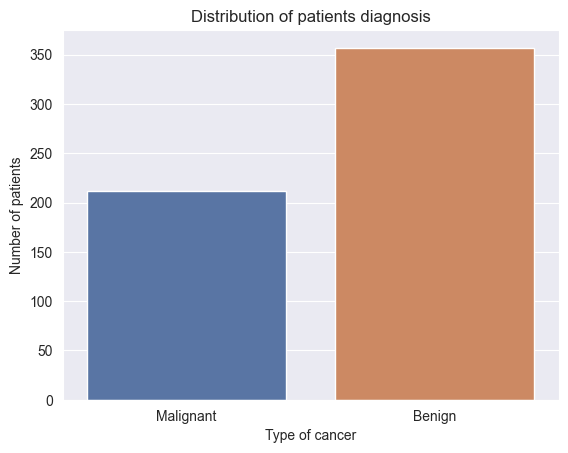

In [703]:
B, M = y.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)

ax = sns.barplot(x = y.value_counts().index,
                 y = y.value_counts(),
                 palette = 'deep')
ax.set_title('Distribution of patients diagnosis')
ax.set_xticklabels(['Malignant', 'Benign'])
ax.set_xlabel('Type of cancer')
ax.set_ylabel('Number of patients')

Benign tumors are more common in the dataset, but this result is not so large as to disrupt the model.

In [704]:
featureMeans =  list(X.columns[:10])
featureErrors = list(X.columns[10:20])
featureWorst =  list(X.columns[20:30])
print(featureMeans)
print(featureErrors)
print(featureWorst)

['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension']
['radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error']
['worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']


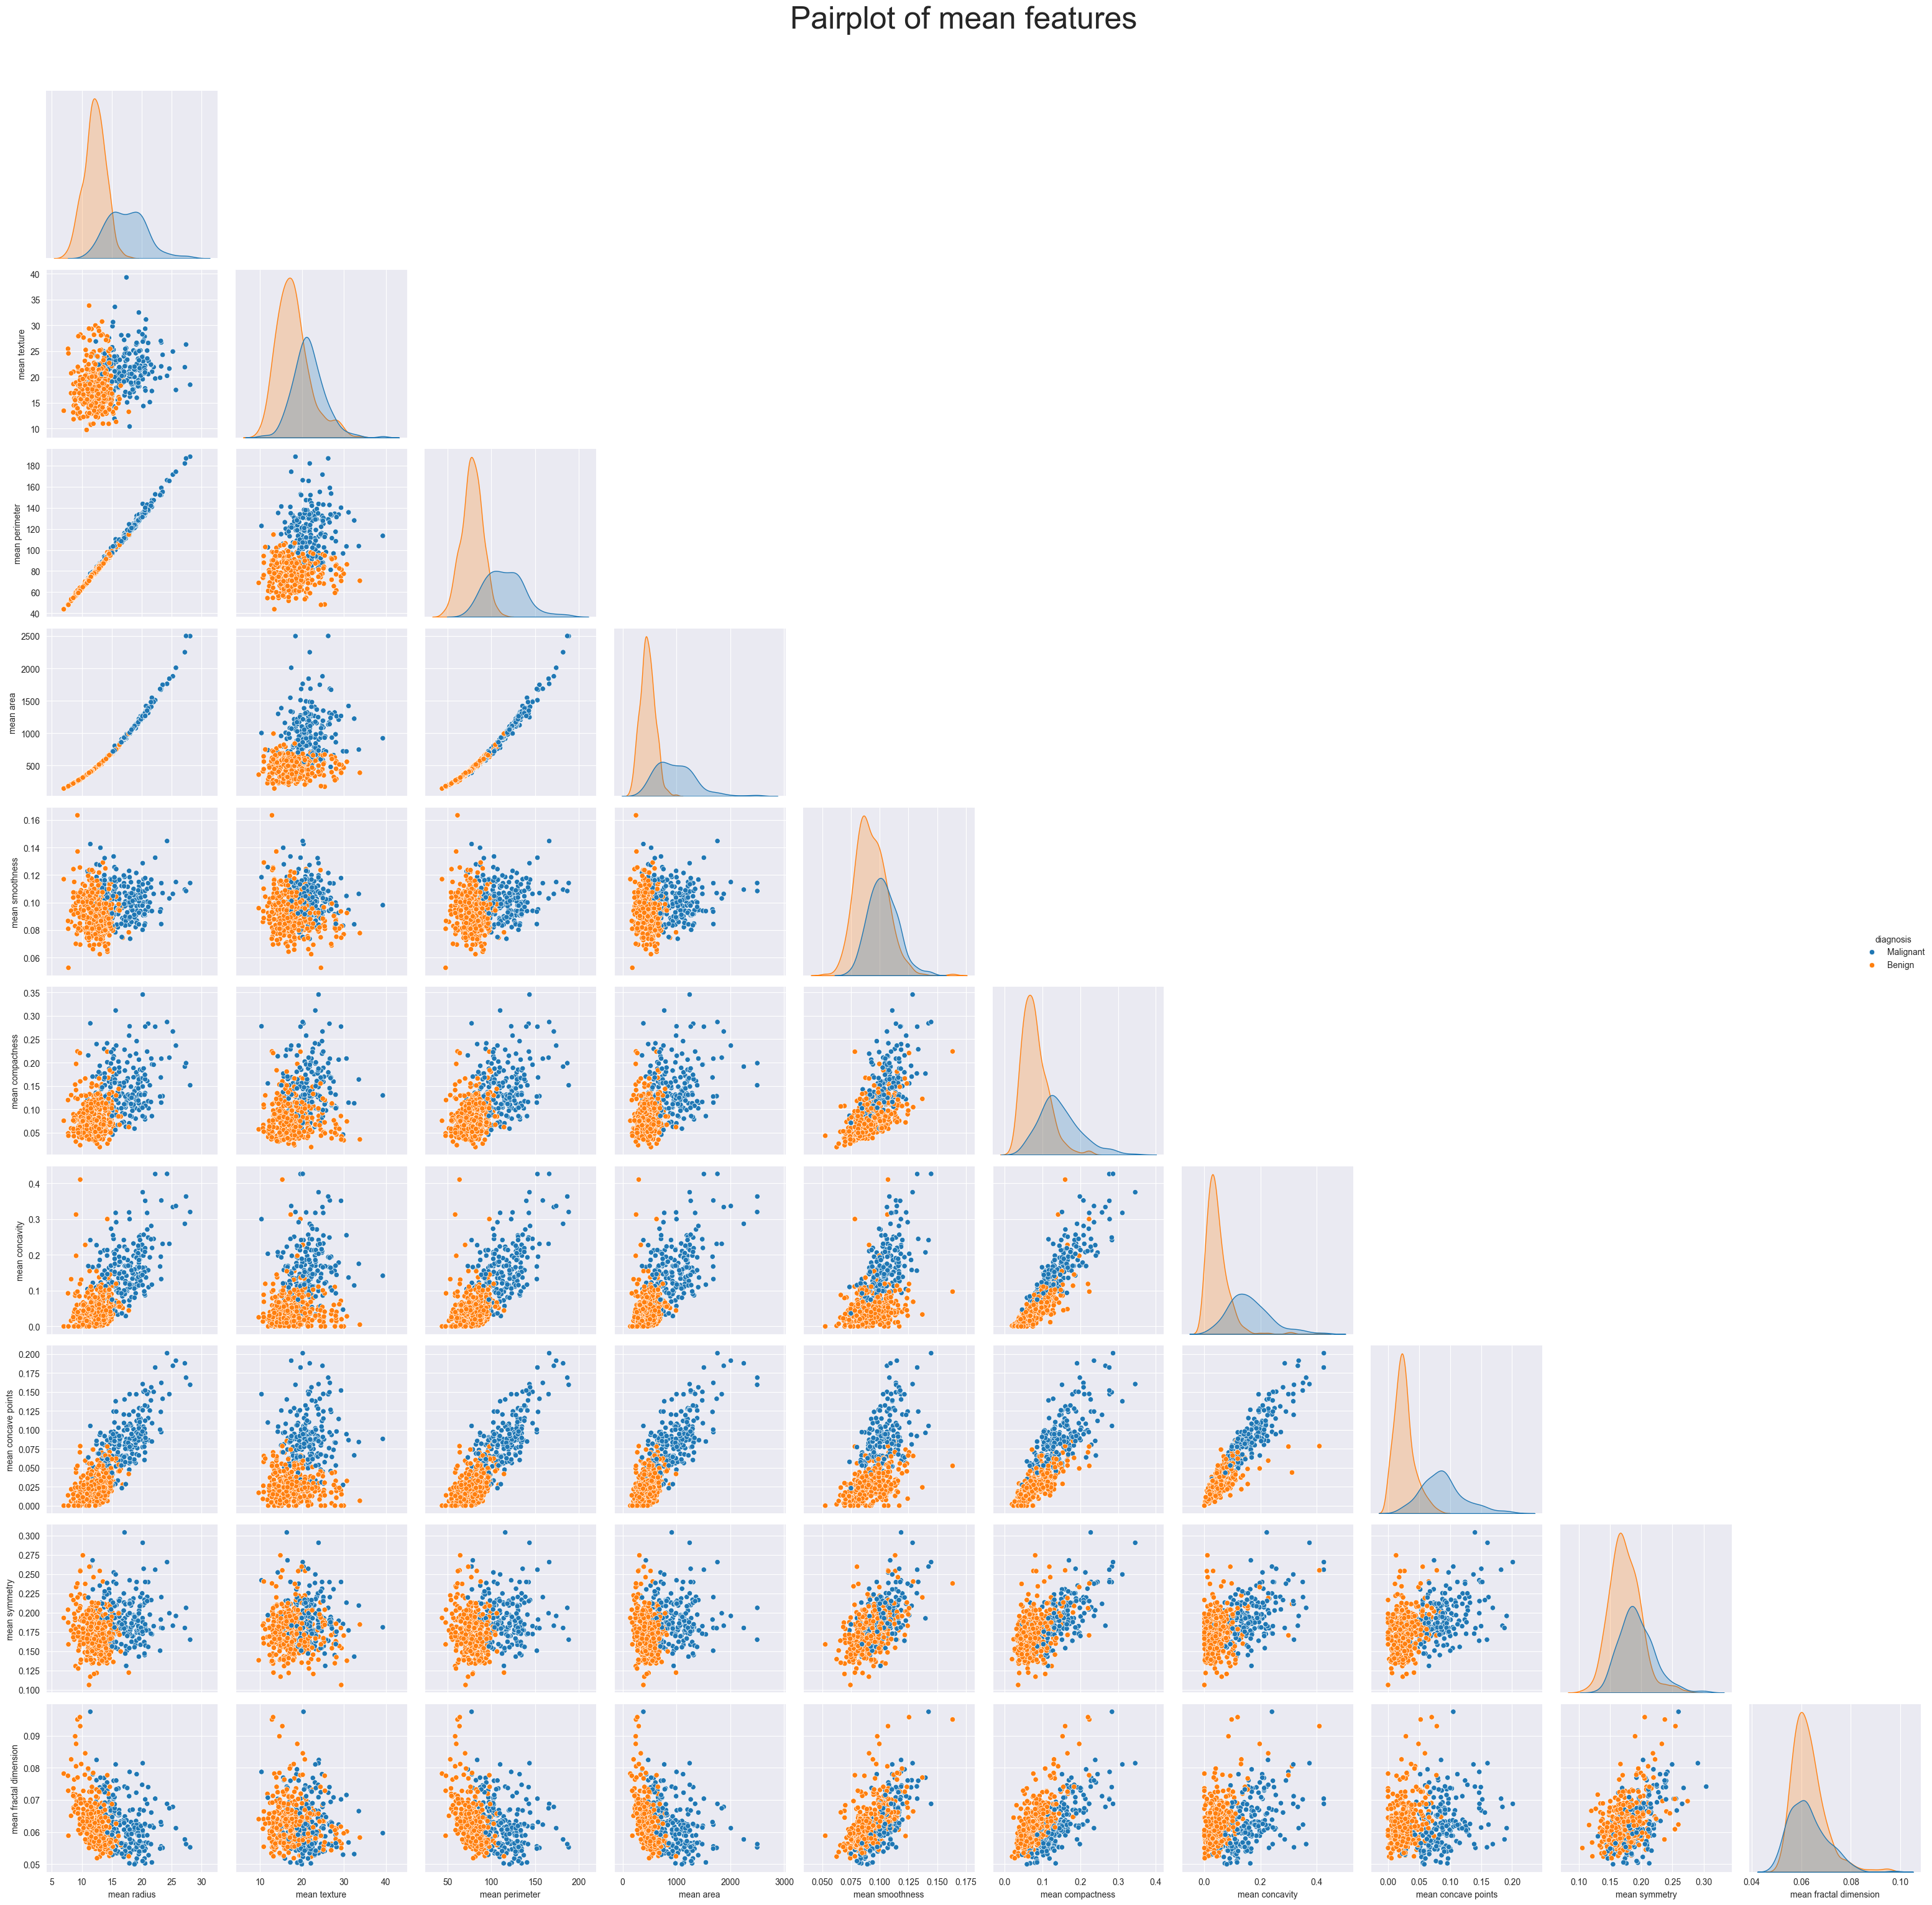

In [705]:
ax = sns.pairplot(data=data[featureMeans +['diagnosis']],
                  hue="diagnosis", height=3, corner = True)

ax.fig.suptitle('Pairplot of mean features', y=1.02, fontsize=36)
plt.tight_layout()
plt.show()

### Mean features
Mean values are calculated based on tumor features and help identify typical size, texture or shape of the tissue. They can provide information about the overall structure of the tumor.

We are looking for features that do not overlap significantly, as this would make it easier for the model to classify tumors as benign or malignant.

### Correlatioin between features
As we can see there is a strong correlation between features :

*   **mean radius** and **mean perimeter**,
*   **mean radius** and **mean area**,
*   **mean area** and **mean perimeter**,

These features show a linear relationship, suggesting that they may measure similar tumor properties and may be redundant. Nie powinno to dziwić ponieważ, promień, obwód i powierzchnia odpowiadają za wielkość guza. This should not be surprising because, radius, circumference and area are responsible for the size of the tumor.
### Distribution
The average size of a tumor affects whether it is malignant, which we can see on the diagonal of the graph. In **mean radius**, **mean area** and **mean perimeter** classes have different distributions, suggesting that larger values of these features are more typical of malignant tumors.
The distributions can be helpful in identifying features that best differentiate between benign and malignant tumors.
### Areas of overlap
Classes whose distirbution graphs clearly overlap have a lower predictive value. Such classes are, ie. **mean texture**, **mean smoothness**, **mean symmetry** and **mean fractal dimension**.


###**General Conclusion**
Malignant tumors tend to have higher values in size-related features than benign tumors, indicating that larger and less regular tumors are more likely to be malignant. This insight can guide feature selection and potentially improve model performance by focusing on the most discriminatory features.

### Good for classifier
*   Radius mean, Perimeter mean, Area mean, Compactness mean, Concavity mean, Concave points mean.




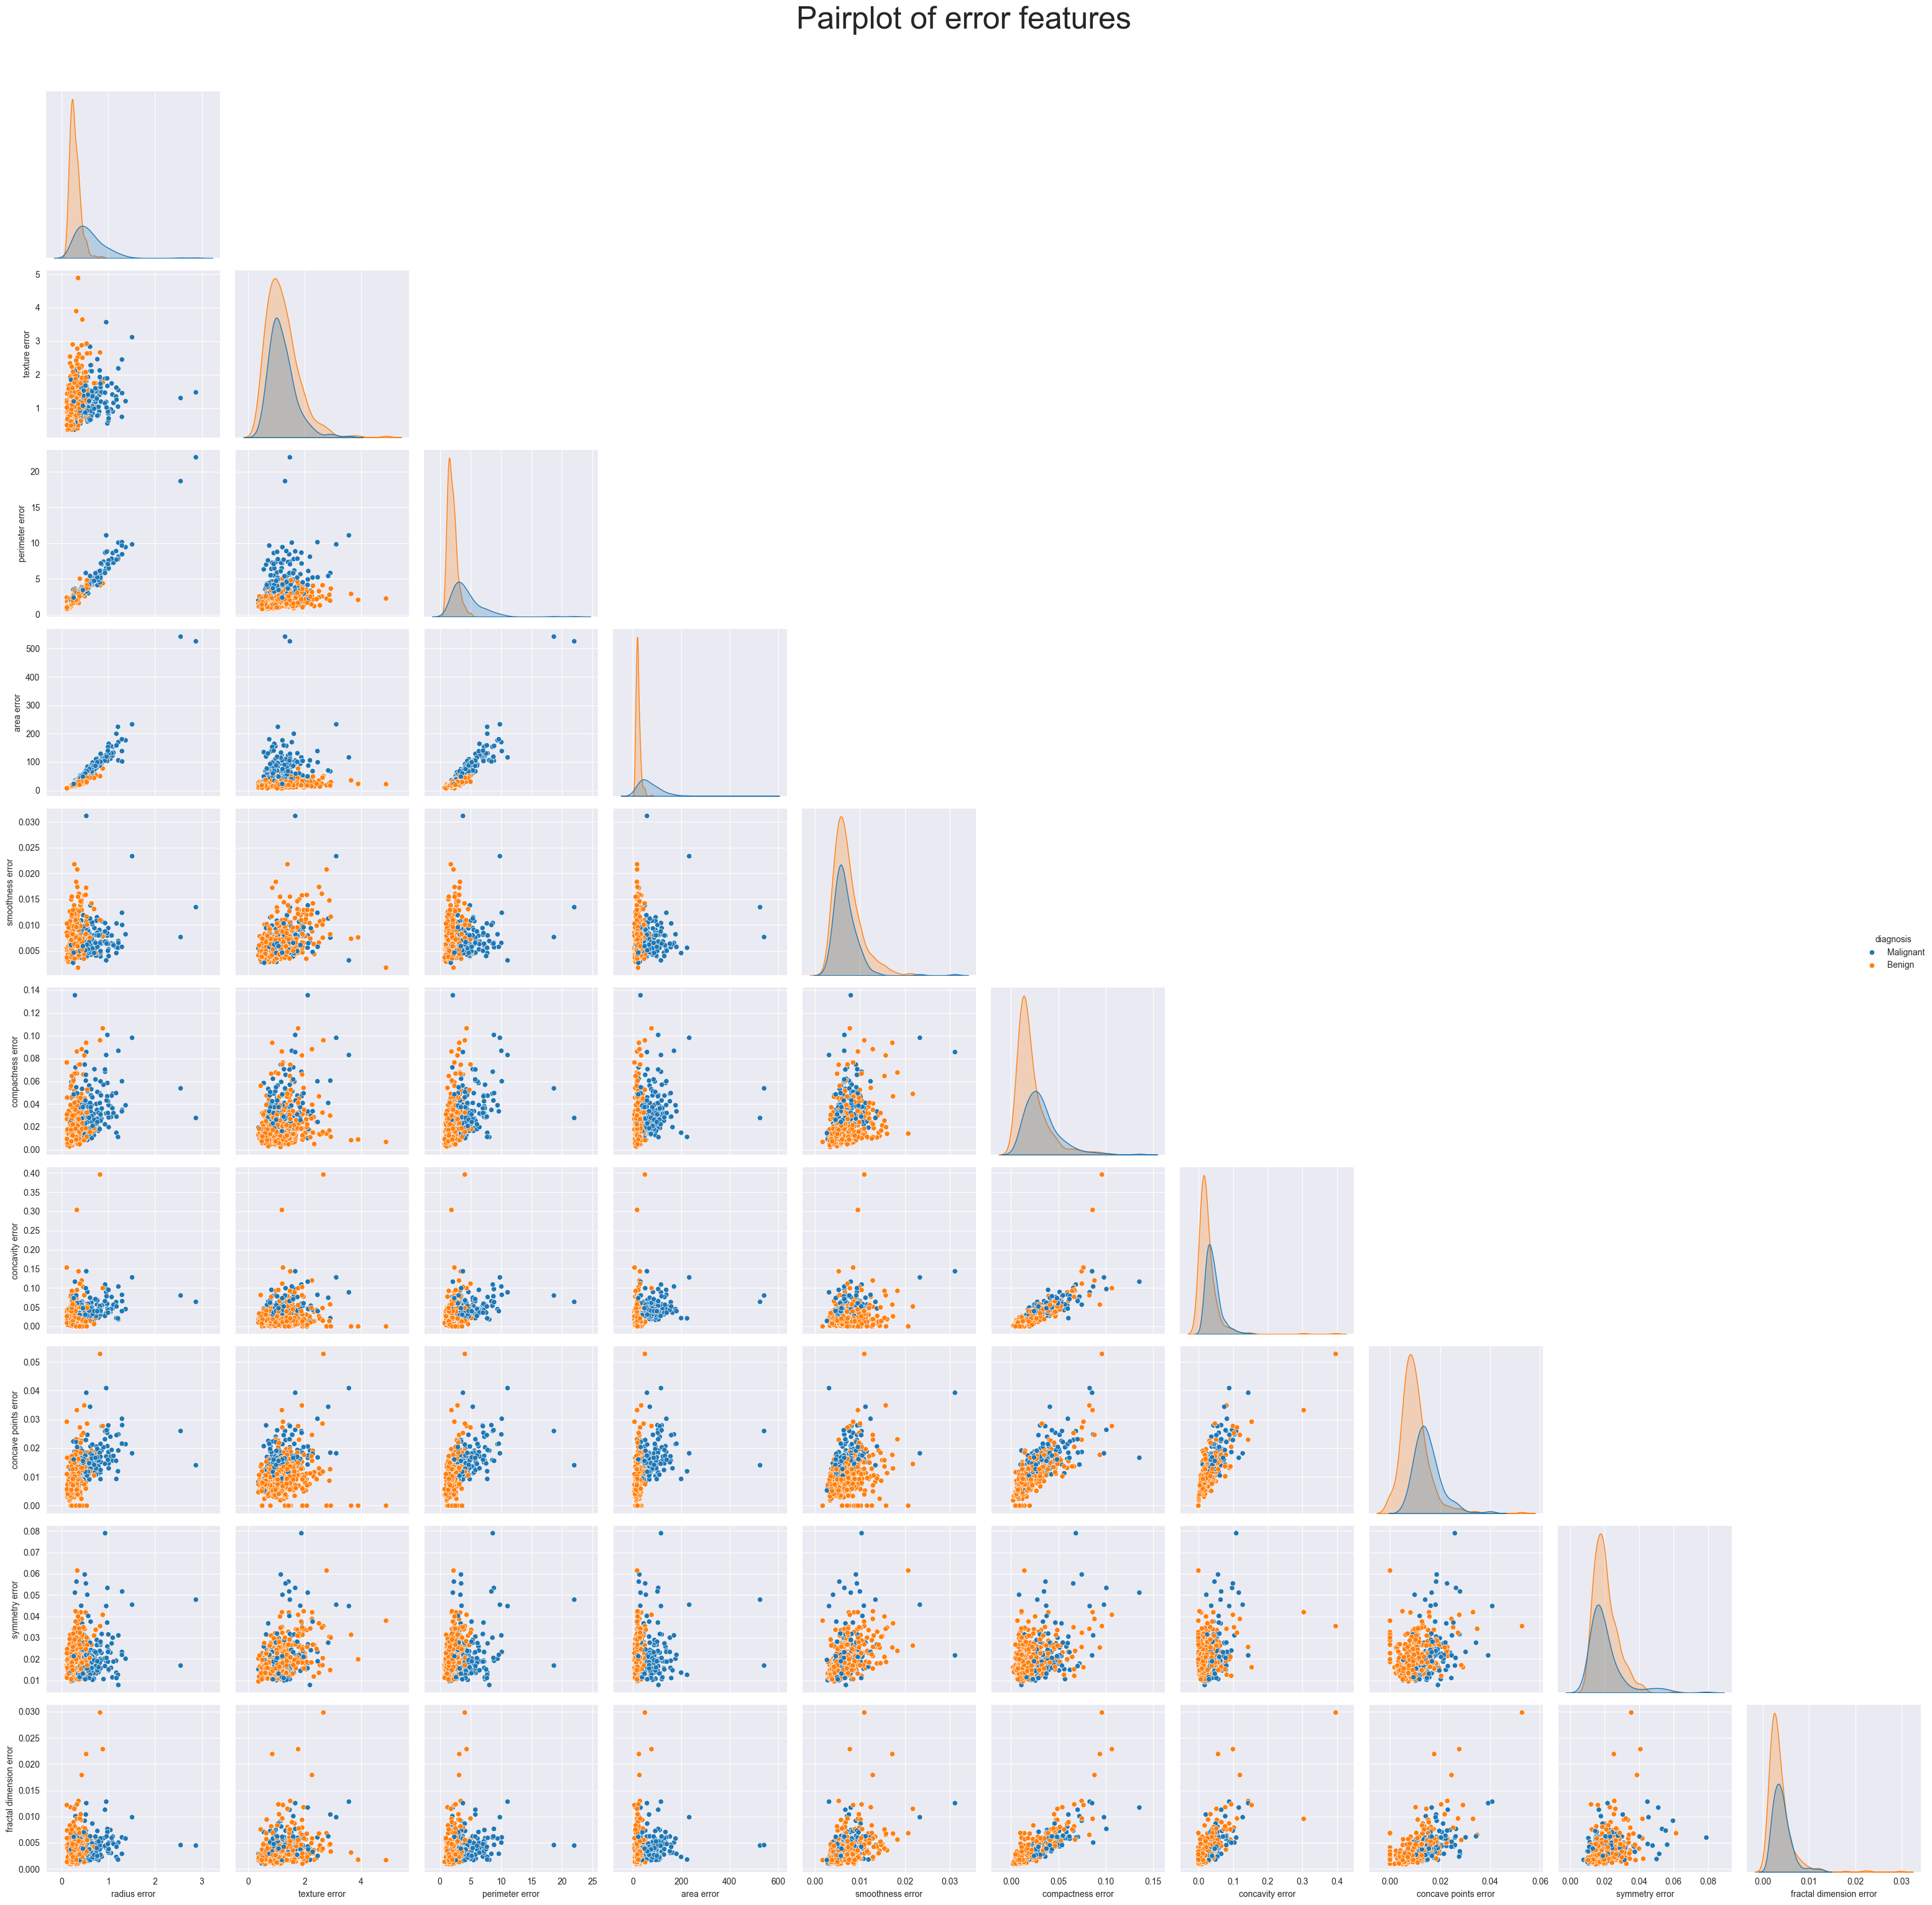

In [706]:
ax = sns.pairplot(data=data[featureErrors +['diagnosis']],
                  hue="diagnosis", height=3, corner = True)

ax.fig.suptitle('Pairplot of error features', y=1.02, fontsize=36)
plt.tight_layout()
plt.show()

### Error features
### Correlatioin between features
We can see it again, the same features are correlated :

*   **mean radius** and **mean perimeter**,
*   **mean radius** and **mean area**,
*   **mean area** and **mean perimeter**,

Features are less correlated by error than with averages. Mean values are more unambiguous and can better differentiate between classes (benign vs. malignant). Errors may be more related to tumor irregularity, but their dispersion makes them less predictive power compared to mean values.

### Distribution
The average size of a tumor affects whether it is malignant, which we can see on the diagonal of the graph. In **radius error**, **perimeter error** and **area error** classes have different distributions, suggesting that larger values of these features are more typical of malignant tumors.
The distributions can be helpful in identifying features that best differentiate between benign and malignant tumors.
### Areas of overlap
Classes whose distirbution graphs clearly overlap have a lower predictive
value. Such classes are, ie. **texture error**, **smoothness error**, **compactness error**, **concavity error**, **concave points error**, **symmetry error** and **fractal dimension error**. This means that 7/10 of the features overlap, leading to a situation where most of the features are unimportant for the prediction of the model.
### Outaliers
In the error graphs, we can see outliers that belong to both classes (dangerous and nice). Outliers can affect the performance of the model. Outliers indicate the exceptional irregularity of a tumor. They can help detect tumors with more irregular shapes.

### General conclusion:
The error features reveal more about the chaotic and irregular nature of tumor growth, particularly in malignant cases, but they carry lower predictive power due to high variability and overlapping distributions.

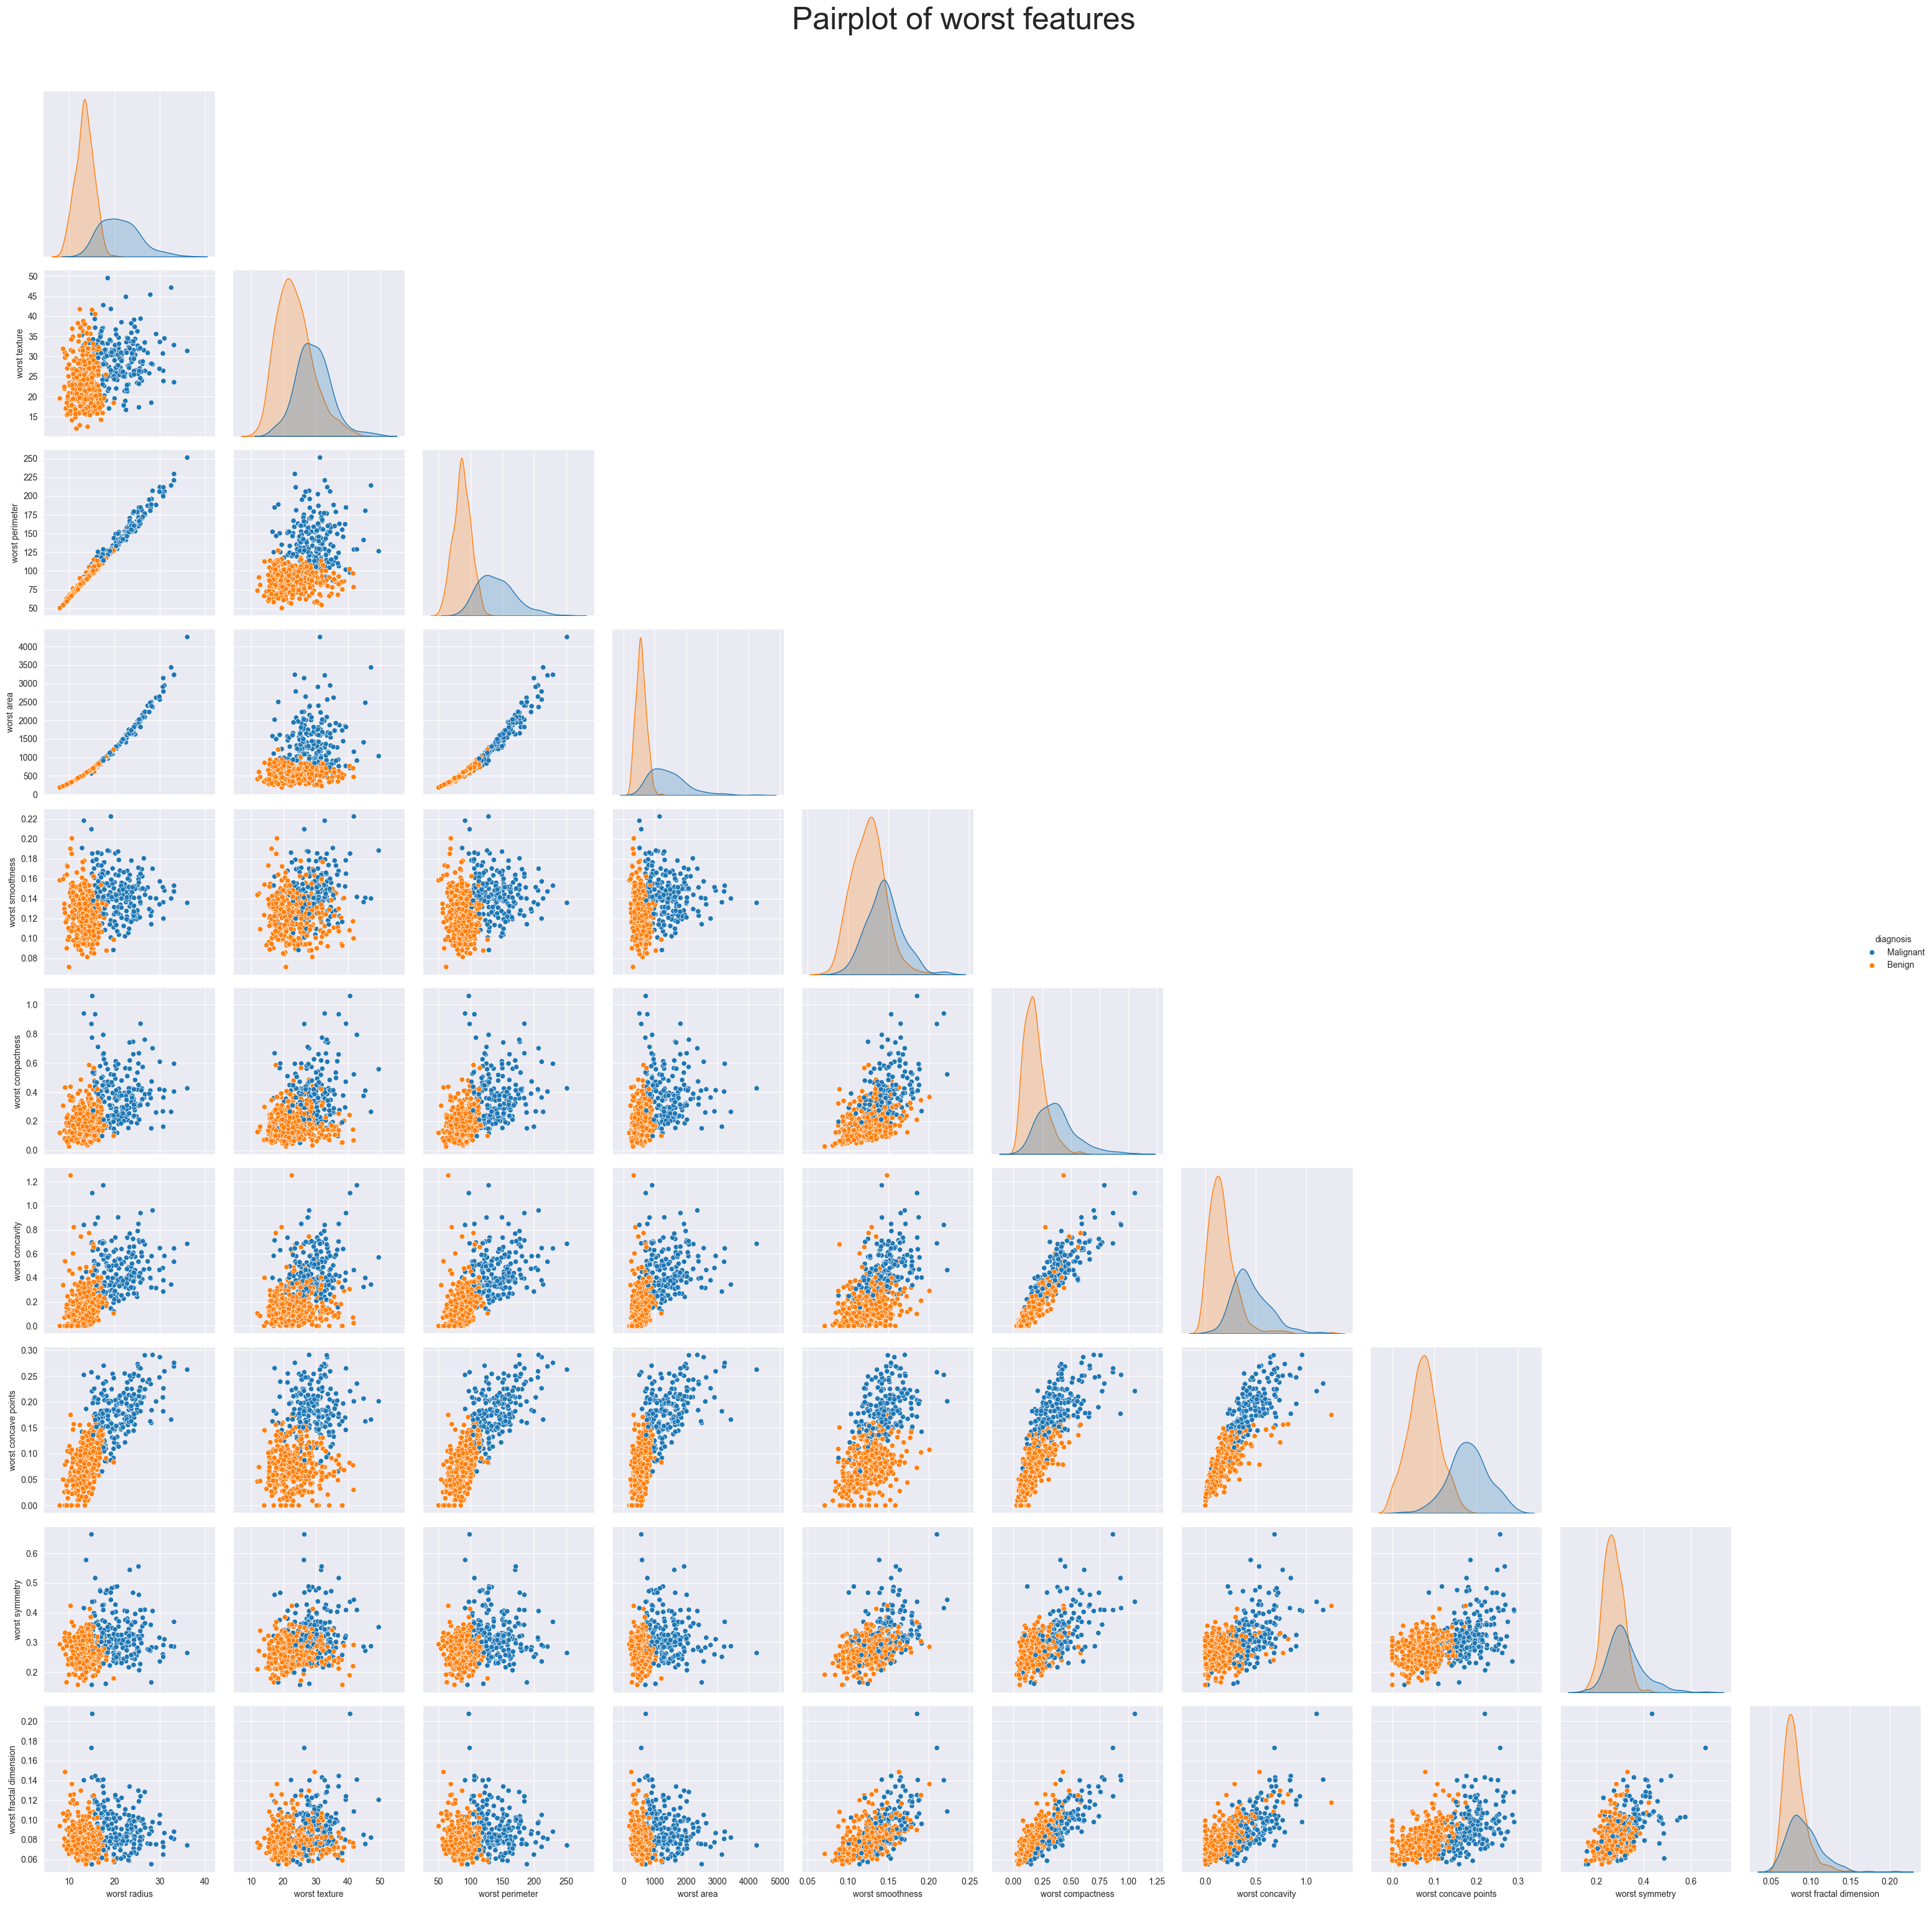

In [707]:
ax = sns.pairplot(data=data[featureWorst +['diagnosis']],
                  hue="diagnosis", height=3, corner = True)

ax.fig.suptitle('Pairplot of worst features', y=1.02, fontsize=36)
plt.tight_layout()
plt.show()

### Worst features 
#### Correlation Between Features
The pairplot reveals strong correlations between several "worst" features:
- **worst radius** and **worst perimeter**,
- **worst radius** and **worst area**,
- **worst area** and **worst perimeter**.

These features show even stronger correlation compared to other feature groups. This suggests that the size-related attributes of tumors are significant indicators of malignancy. Tumors that are larger in radius, area, or perimeter are often malignant.

#### Distribution
The distributions of the "worst" features, such as **worst radius**, **worst perimeter**, and **worst area**, demonstrate clear differences between the two classes. Malignant tumors tend to have higher values for these features, making these attributes crucial for distinguishing between benign and malignant tumors.

For other features like **worst texture**, **worst smoothness**, and **worst fractal dimension**, the distributions overlap more between classes. This indicates these features may be less useful in distinguishing between benign and malignant tumors.

#### Areas of Overlap
There is significant overlap for features such as **worst texture**, **worst smoothness**, **worst compactness**, and **worst symmetry**. This overlap reduces their predictive value in the model. Despite their overlap, they might still provide complementary information when used in conjunction with size-related features.

#### Outliers
Outliers are present in some of the "worst" features for both benign and malignant tumors. These outliers likely represent extreme cases of tumor growth or irregularity, particularly in malignant cases. While they provide valuable insights into atypical tumor characteristics, they may also introduce noise into the model.

#### General Conclusion
The "worst" features highlight the most extreme tumor characteristics, often associated with malignancy. Features related to tumor size (radius, perimeter, and area) are the most predictive and show clear distinctions between classes. However, features with overlapping distributions and the presence of outliers suggest the need for careful preprocessing or feature selection to ensure optimal model performance.







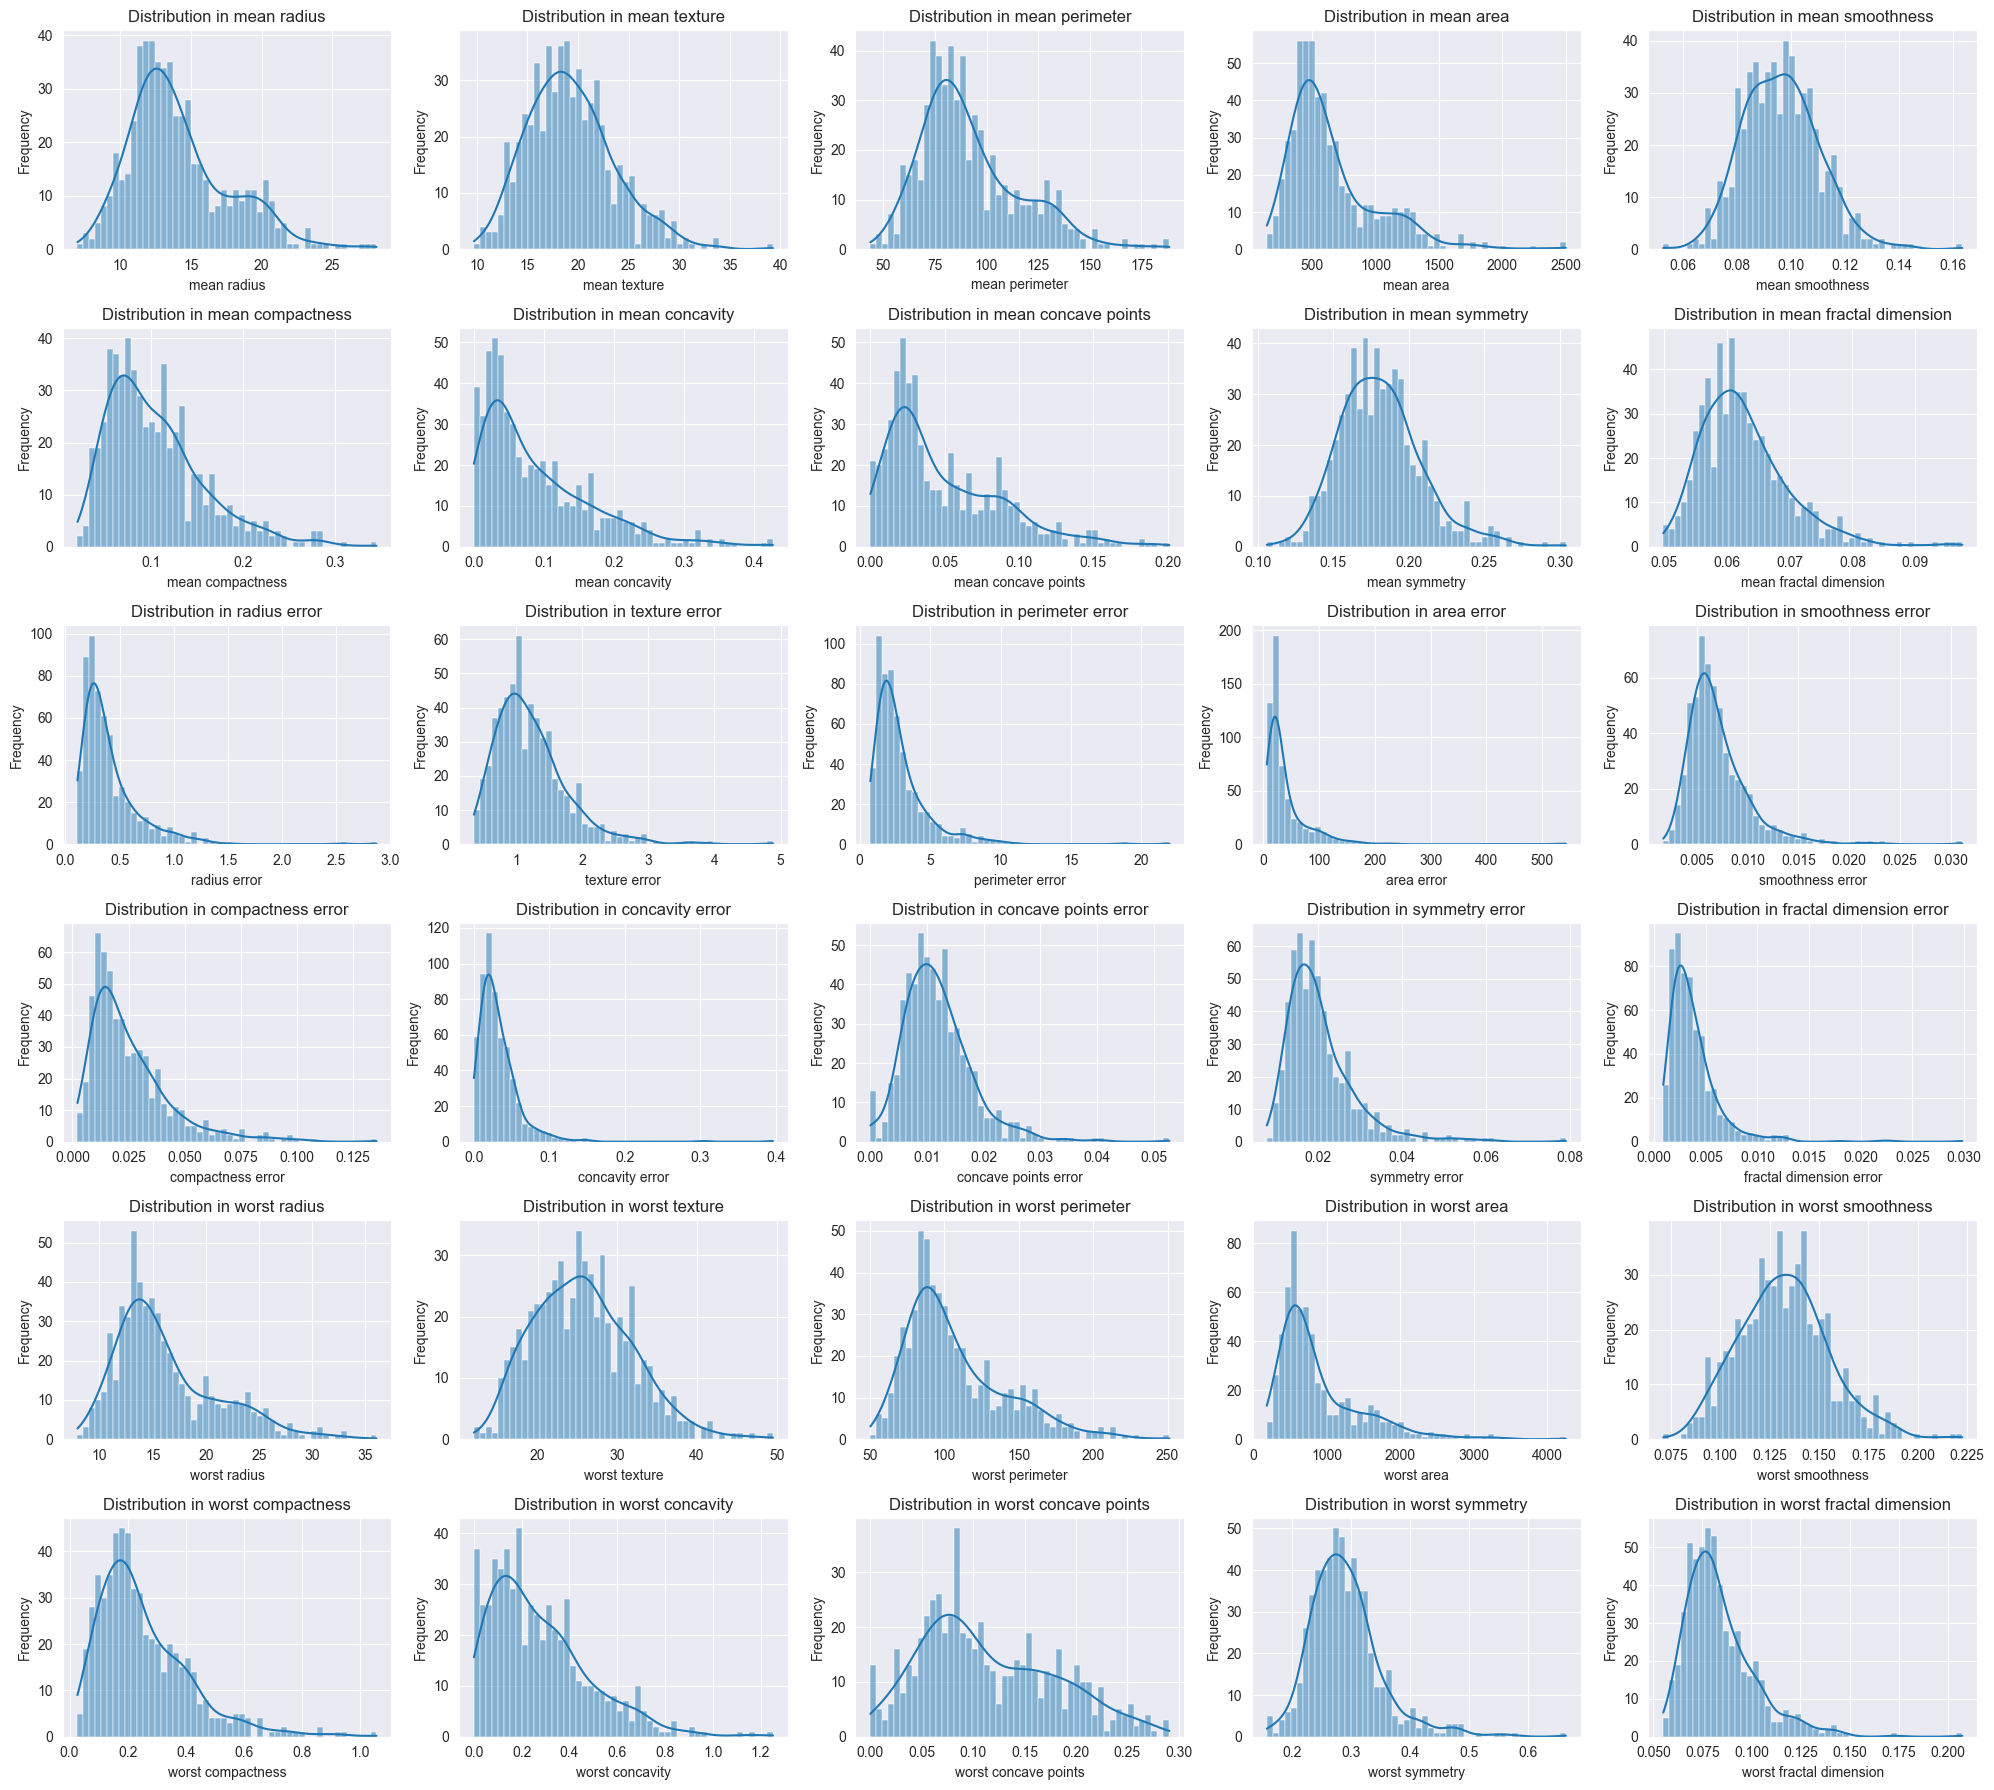

In [708]:
def plot_distribution(df, num_columns):
    '''
    This function is used to represent the distribution of the data in each column.
    It takes two parameters: data set, number of columns to be displayed per row.
    Data of type "object" or containing less than 10 unique values is displayed as "barplot",
    while other data is displayed as "histplot".
    '''
    num_cols = len(df.columns)
    num_rows = math.ceil(num_cols / num_columns)

    fig, axes = plt.subplots(num_rows, num_columns, figsize = (num_columns * 4, num_rows * 3))
    axes = axes.flatten()


    for i, col in enumerate(df.columns):
        ax = axes[i]

        if df[col].dtype == 'object' or df[col].nunique() < 10:
            distribution = df[col].value_counts()
            sns.barplot(x=distribution.index, y=distribution.values, ax = ax)
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')
            ax.set_title(f'Distribution in {col}')

        else:
            sns.histplot(df[col], kde=True, bins=50, ax = ax)
            ax.set_xlabel(col)
            ax.set_ylabel('Frequency')
            ax.set_title(f'Distribution in {col}')

    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

plot_distribution(X,5)

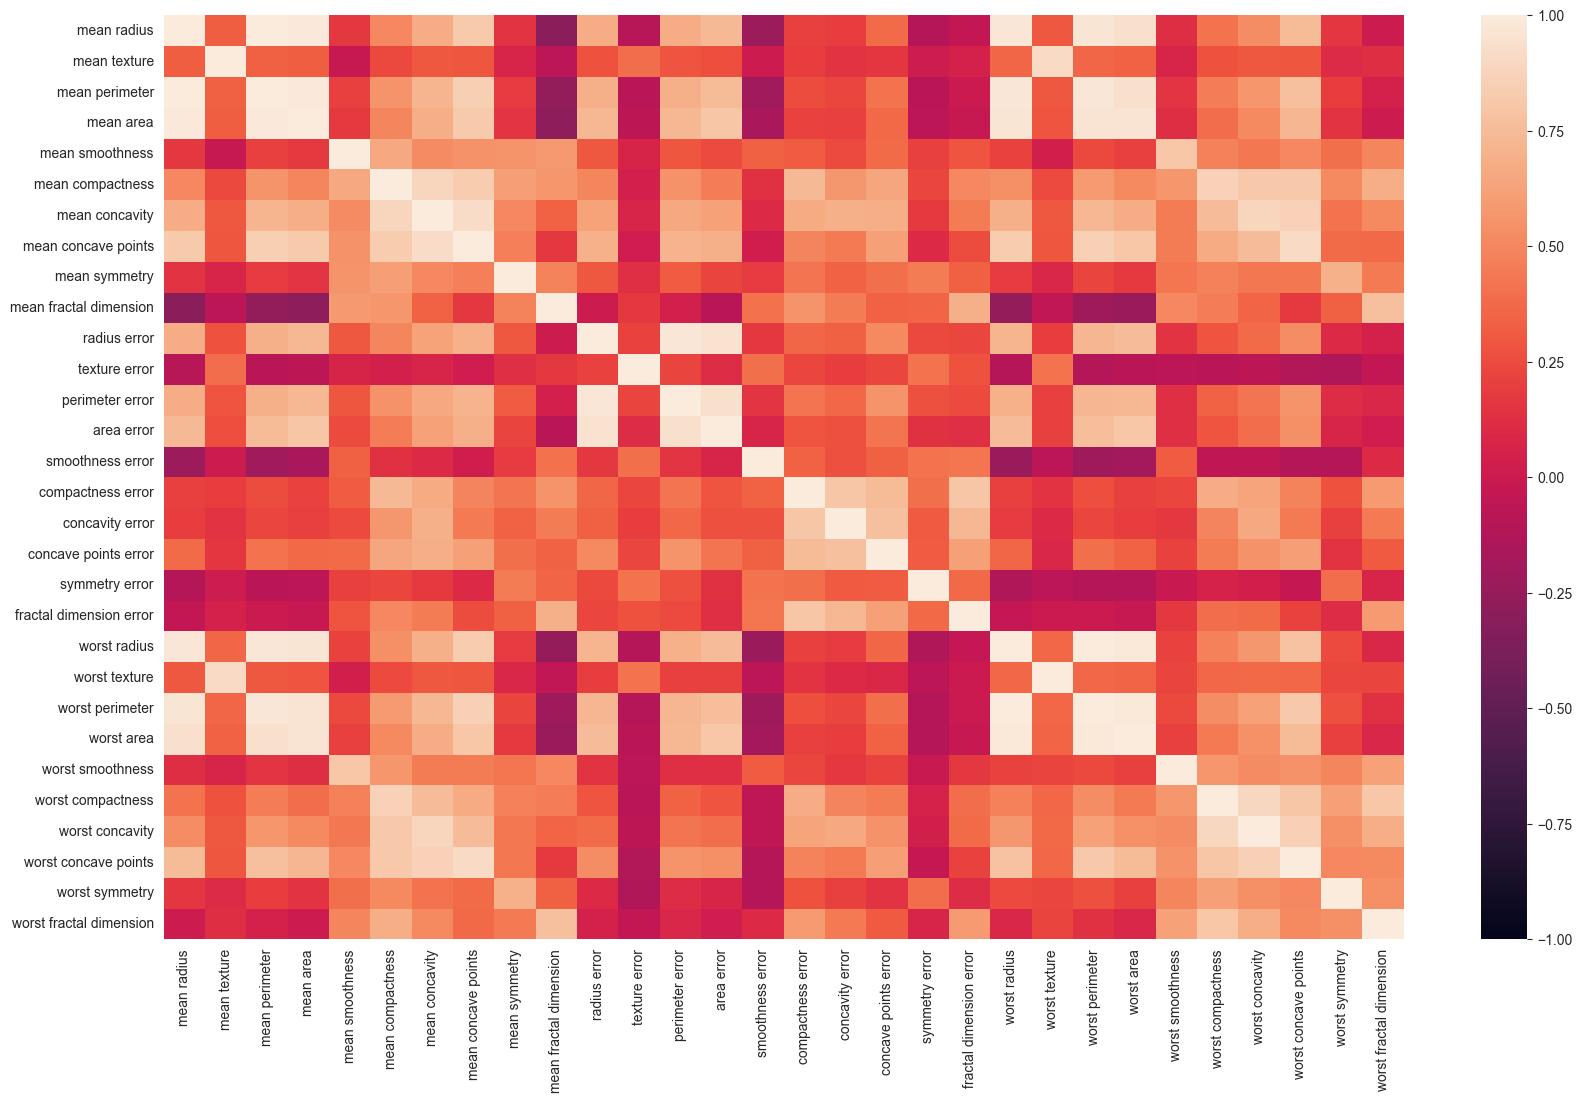

In [709]:
corr = X.corr()

plt.figure(figsize=(20,12))
sns.heatmap(corr ,vmin= -1, vmax= 1)
plt.show()


In [710]:
threshold = 0.75
correlated_features = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > threshold:
            colname = corr.columns[i]
            correlated_features.add(colname)

print(f"Features to consider removing: {correlated_features}")

Features to consider removing: {'worst texture', 'worst concave points', 'worst area', 'concave points error', 'worst perimeter', 'worst compactness', 'worst concavity', 'mean concave points', 'concavity error', 'worst fractal dimension', 'worst radius', 'worst smoothness', 'mean area', 'mean concavity', 'area error', 'perimeter error', 'fractal dimension error', 'mean perimeter'}


The features are for consideration to remove them, which will simplify the model. In further stages, consideration will be given to transforming them or removing them. 

#  Data preparation and preprocessing

## Feature engineering

### PCA for square features

We want to reduce highly correlated features such as:
*  **radius**, **perimeter** and **area**.

For this we will use PCA modules

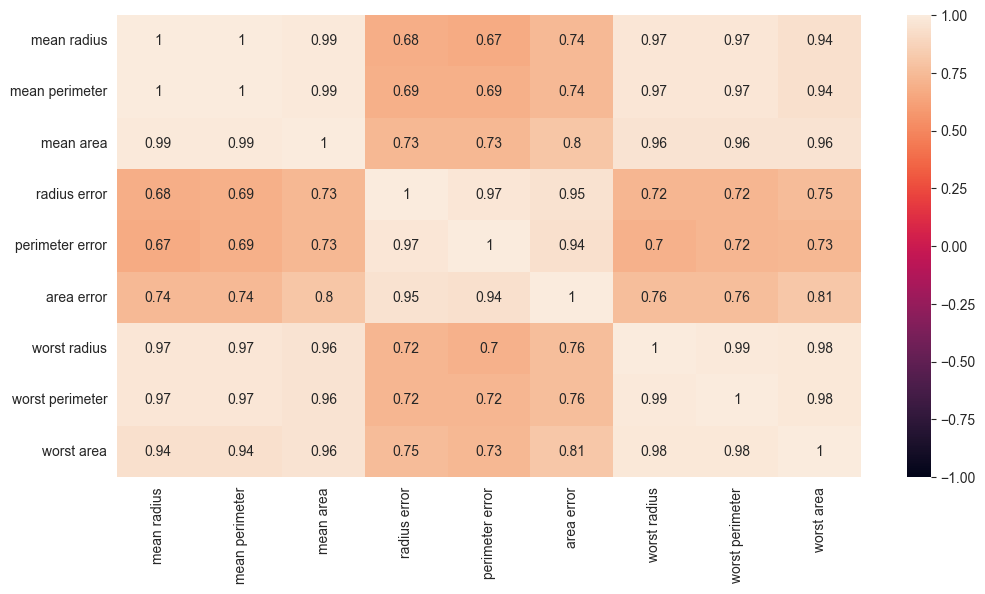

In [711]:
selected_features1 = ['mean radius', 'mean perimeter', 'mean area',
                      'radius error', 'perimeter error', 'area error',
                      'worst radius', 'worst perimeter', 'worst area']
features1_corr = X[selected_features1].corr().round(2)

plt.figure(figsize=(12,6))
sns.heatmap(features1_corr, annot = True,vmin= -1, vmax= 1)
plt.show()

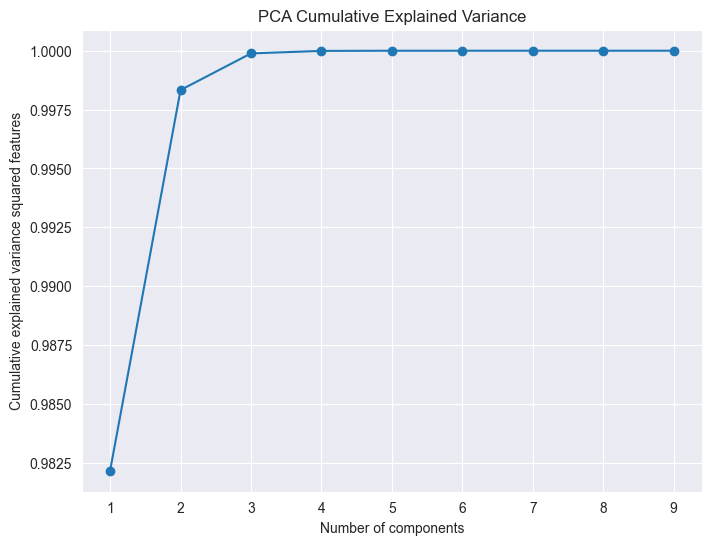


 Number of components to retain: 1


In [712]:
# This code allows me to decide how many dimension I will use in PCA
pca = PCA(random_state = 42)
pca.fit(X[selected_features1])
cumsum = np.cumsum(pca.explained_variance_ratio_)
d_squared = np.argmax(cumsum >= 0.95) + 1         # we will use this variable later in preprocessor


plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumsum) + 1), cumsum, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance squared features' )
plt.title('PCA Cumulative Explained Variance')
plt.grid(True)
plt.show()

print(f'\n Number of components to retain: {d_squared}')

### PCA for irregularity features

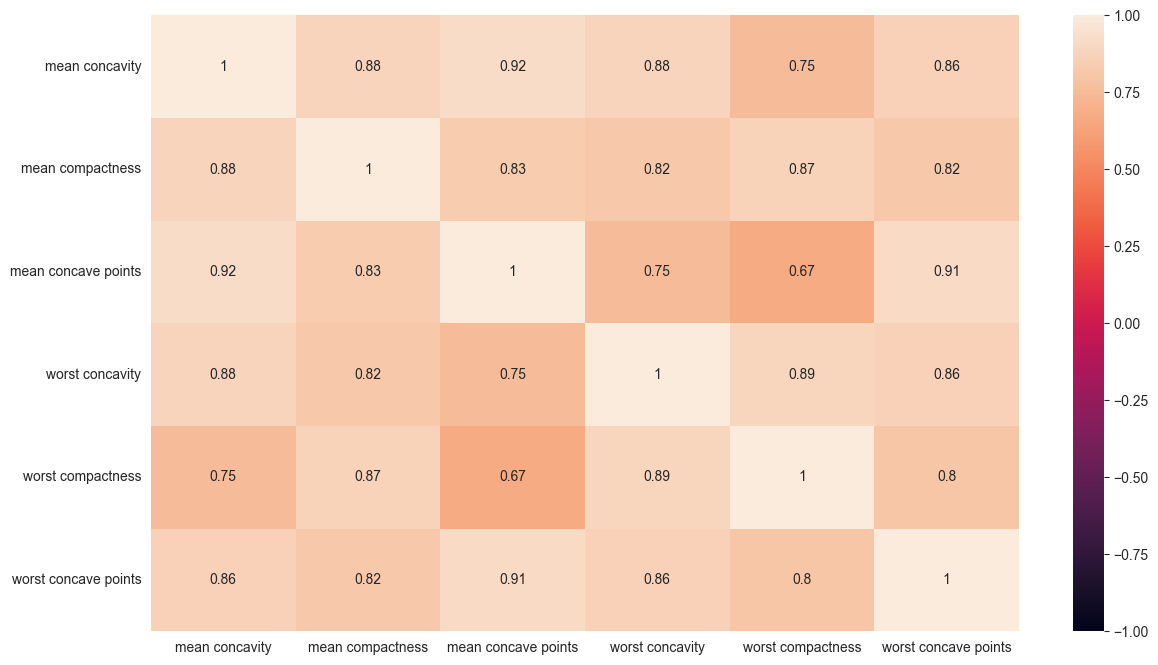

In [713]:
selected_features2 = ['mean concavity', 'mean compactness', 'mean concave points',
                      'worst concavity', 'worst compactness', 'worst concave points']

features2_corr = X[selected_features2].corr().round(2)

plt.figure(figsize=(14,8))
sns.heatmap(features2_corr, annot = True,vmin= -1, vmax= 1)
plt.show()


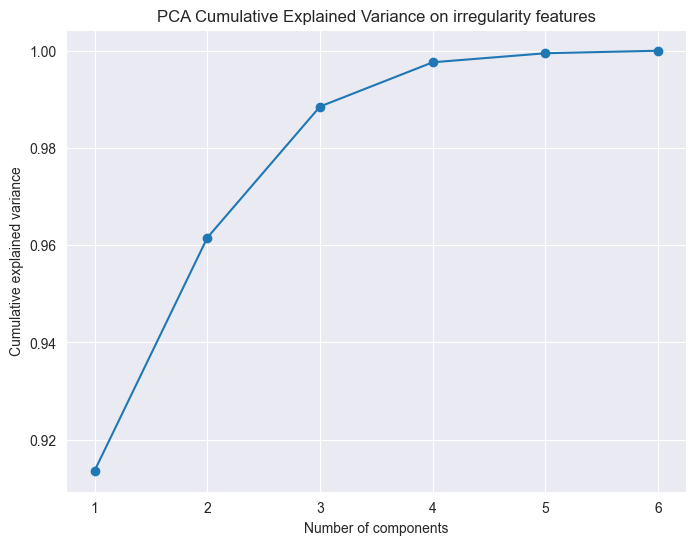


 Number of components to retain: 2


In [714]:
pca = PCA(random_state = 42)
pca.fit(X[selected_features2])
cumsum = np.cumsum(pca.explained_variance_ratio_)
d_irregularity = np.argmax(cumsum >= 0.95) + 1      # we will use this variable later in preprocessor

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cumsum) + 1), cumsum, marker='o')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('PCA Cumulative Explained Variance on irregularity features')
plt.grid(True)
plt.show()

print(f'\n Number of components to retain: {d_irregularity}')


### Removing of **mean** and **worst** features with high correlation

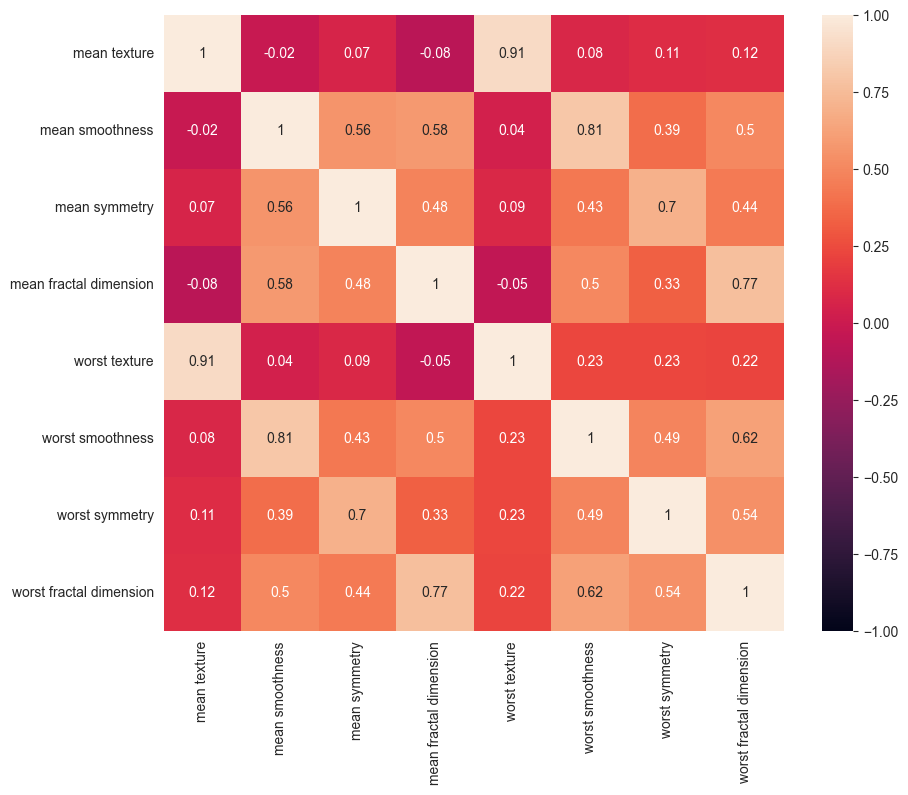

In [715]:
morphology_features = ['mean texture', 'mean smoothness','mean symmetry', 'mean fractal dimension',
                       'worst texture', 'worst smoothness','worst symmetry', 'worst fractal dimension']

morphology_corr = X[morphology_features].corr().round(2)

plt.figure(figsize=(10,8))
sns.heatmap(morphology_corr, annot=True ,vmin= -1, vmax= 1)
plt.show()

As we can see there is a high correlation between the counterparts in **mean** and **worst**. For this reason, it is worthwhile to redact features such as:

*   **texture**,
*   **smoothness**
*   **symmetry**
*   **fractal dimension**



In [716]:
threshold = 0.7
correlated_features = list()
for i in range(len(morphology_corr.columns)):
    for j in range(i):
        if abs(morphology_corr.iloc[i, j]) >= threshold:
            colname = morphology_corr.columns[i]
            correlated_features.append(colname)

print(f"Features to consider removing: {correlated_features}")

Features to consider removing: ['worst texture', 'worst smoothness', 'worst symmetry', 'worst fractal dimension']


In [717]:
# Function to remove columns from a dataframe. In later steps will use it in the preprocessor
def drop_features(X,df):
    return X.drop(columns = df, axis = 1)

## Split of data into training and test data

In [718]:
X_train, X_test, y_train,  y_test = train_test_split(X , y ,test_size = 0.25, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((426, 30), (143, 30), (426,), (143,))

# Goal of classification

Our goal is to classify as many malignant tumors as possible. It is better for the patient if her benign tumor is classified as malignant than the other way around. Treating a tumor too poorly, can lead to complications in the patient's treatment, so we want to invent more malignant tumors even at the expense of model accuracy. The measure we will study will be **Recall**, which is described by the formula:

$$ \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}} $$

# Building  ML models

## Preprocessor

In [719]:
preprocessor = ColumnTransformer(
    transformers = [
    ('pca_squared', PCA(n_components=d_squared), selected_features1),
    ('pca_irregularity', PCA(n_components=d_irregularity), selected_features2),
    ('drop', FunctionTransformer(drop_features, kw_args={'df': list(correlated_features)}), correlated_features),
    ], remainder = 'passthrough'
)


## Pipelines

### XGBoost pipeline

Gradient Boosting usually performs very well in classification. It handles data with a wide variety of features well and allows flexible adjustment of hyperparameters. It is more complex than Random Forest, which can produce better results on data.

In [720]:
xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scale', StandardScaler()),
    ('classifier', XGBClassifier())
])

### Random forest pipeline

Random Forest handles a variety of features well and is resistant to overfitting, which is important with less data.


In [721]:
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scale', StandardScaler()),
    ('classifier', RandomForestClassifier())
])

### Logistic regression pipeline

Logistic Regression is simple, fast and interpretable. It can be used as a reference.

In [722]:
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scale', StandardScaler()),
    ('classifier', LogisticRegression())
])

### SVC pipeline

SVM with RBF kernel works well on smaller datasets


In [723]:
svc_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scale', StandardScaler()),
    ('classifier', SVC())
])

### Decision Tree pipeline

Interpretation of decision tree classifier is easy

In [724]:
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('scale', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

# Model train and test data


## Modeling on data from pipeline

In [725]:
def model_eval(pipeline, cv=5):
    # Fit the pipeline and evaluate on the test set
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # calculate metrics
    acc = round(accuracy_score(y_test, y_pred) * 100, 2)
    recall = round(recall_score(y_test, y_pred) * 100, 2)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f'Recall on test data:  {recall} % \n')
    print(f"Classification Report:\n{class_report}")

    # Cross-validation
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='recall')
    avg_cv_score = round(cv_scores.mean() * 100, 2)
    print(f'Average Cross-Validation recall ({cv}-fold): {avg_cv_score} %')
    print(f'Cross-Validation Scores: {cv_scores} \n')

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=cancer.target_names, yticklabels=cancer.target_names)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()


### XGBoost Classifier



Recall on test data:  98.88 % 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.99      0.99      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143

Average Cross-Validation recall (5-fold): 97.4 %
Cross-Validation Scores: [0.96296296 0.94444444 0.98148148 0.98113208 1.        ] 



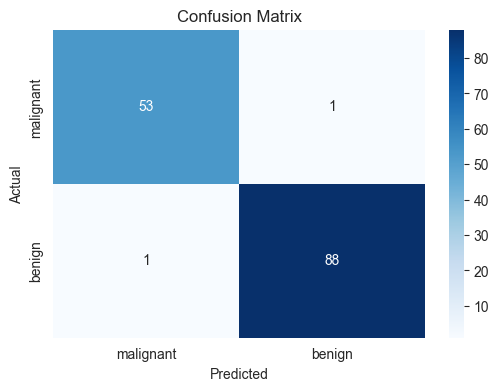

In [726]:
model_eval(xgb_pipeline)

### Random forrest classifier

Recall on test data:  98.88 % 

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97        54
           1       0.98      0.99      0.98        89

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Average Cross-Validation recall (5-fold): 97.77 %
Cross-Validation Scores: [0.96296296 0.96296296 0.98148148 1.         0.98113208] 



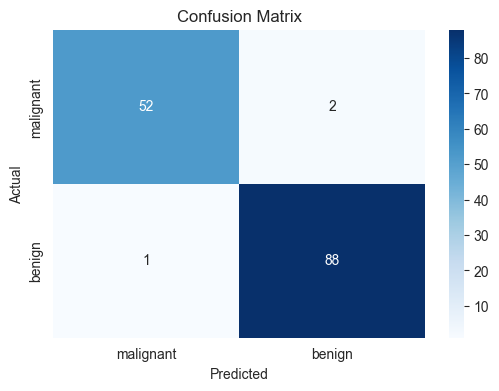

In [727]:
model_eval(rf_pipeline)

### Logistic regression classifier

Recall on test data:  96.63 % 

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        54
           1       0.98      0.97      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.97       143

Average Cross-Validation recall (5-fold): 99.26 %
Cross-Validation Scores: [0.96296296 1.         1.         1.         1.        ] 



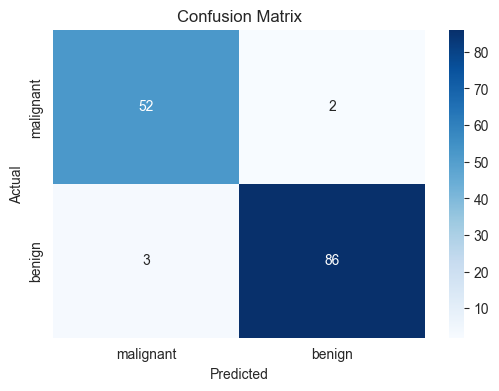

In [728]:
model_eval(lr_pipeline)

### SVM classifier

Recall on test data:  97.75 % 

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.89      0.92        54
           1       0.94      0.98      0.96        89

    accuracy                           0.94       143
   macro avg       0.95      0.93      0.94       143
weighted avg       0.94      0.94      0.94       143

Average Cross-Validation recall (5-fold): 98.12 %
Cross-Validation Scores: [0.98148148 1.         1.         0.96226415 0.96226415] 



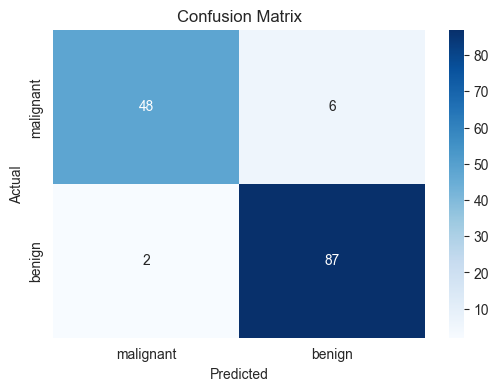

In [729]:
model_eval(svc_pipeline)

### Decision tree classifier

Recall on test data:  93.26 % 

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93        54
           1       0.98      0.93      0.95        89

    accuracy                           0.94       143
   macro avg       0.94      0.95      0.94       143
weighted avg       0.95      0.94      0.94       143

Average Cross-Validation recall (5-fold): 95.9 %
Cross-Validation Scores: [0.98148148 0.90740741 0.98148148 0.96226415 0.96226415] 



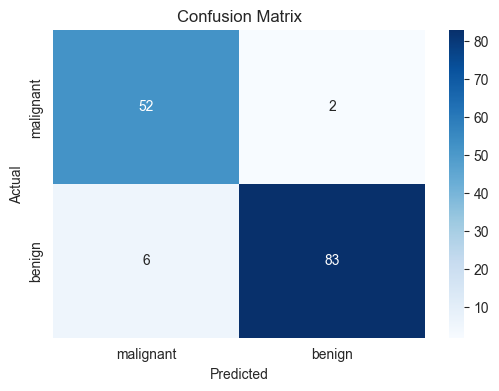

In [730]:
model_eval(dt_pipeline)

## Model evaluation

Each of the selected models achieves **recall >90%** . The best results are achieved by **XGBoost classifier** (98.88%) and **Random Forrest** (100.0%), but after cross-validation, the **Logistic regression**  achieved the best result (99.26%). However, we will check which one achieves better results after hypertuning.

## Hypertuning with GridSearchCV


### XGBoost hypertuning

In [745]:
xgb_param_grid = {
             'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2],
             'classifier__max_depth': [3, 5, 7, 10],
             'classifier__min_child_weight' : [1, 3, 5]
           }

grid_search = GridSearchCV(xgb_pipeline, xgb_param_grid, cv=5, scoring='recall', n_jobs = -1)
grid_search.fit(X_train, y_train)

print(f'Best parameters for XGB: \n {grid_search.best_params_}')
best_xgb_model = grid_search.best_estimator_

xgb_test_score = round(best_xgb_model.score(X_test, y_test) * 100, 2)
print(f'Validation recall after tuning: \n {xgb_test_score}')

xgb_scores = cross_val_score(best_xgb_model, X, y, cv=5, scoring='recall')
print(f'Cross-Validation Scores for XGBoost: {xgb_scores}')
print(f'Mean Cross-Validation Score: {xgb_scores.mean() * 100:.2f}')

Best parameters for XGB: 
 {'classifier__learning_rate': 0.2, 'classifier__max_depth': 7, 'classifier__min_child_weight': 1}
Validation recall after tuning: 
 98.6
Cross-Validation Scores for XGBoost: [0.95774648 0.98591549 0.98611111 0.98611111 0.94366197]
Mean Cross-Validation Score: 97.19



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.99      0.99      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



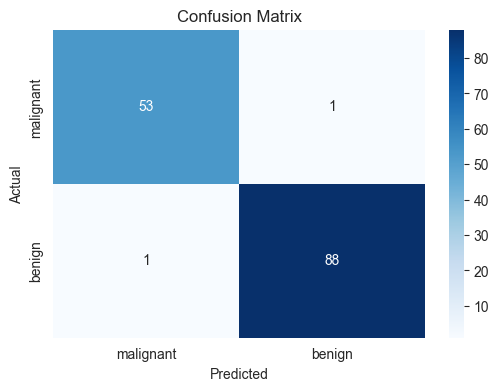

In [746]:
y_pred = best_xgb_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Logistic regression hypertuning

In [733]:
lr_param_grid = {
             'classifier__penalty': ['l1', 'l2'],
             'classifier__C': [0.1, 0.3, 0,6, 0.9],
             'classifier__solver': ['solver', 'lbfgs'],
             'classifier__max_iter': [50, 100, 200, 500],
           }

grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5, scoring='recall', n_jobs = -1)
grid_search.fit(X_train, y_train)

print(f'Best parameters for Logistic regression: \n {grid_search.best_params_}')
best_lr_model = grid_search.best_estimator_

lr_test_score = round(best_lr_model.score(X_test, y_test) * 100, 2)
print(f'Validation recall after tuning: \n {lr_test_score}')

lr_scores = cross_val_score(best_lr_model, X, y, cv=5, scoring='recall')
print(f'Cross-Validation Scores for Logistic regression: {lr_scores}')
print(f'Mean Cross-Validation Score: {lr_scores.mean() * 100:.2f}')

Best parameters for Logistic regression: 
 {'classifier__C': 0.1, 'classifier__max_iter': 50, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}
Validation recall after tuning: 
 97.2
Cross-Validation Scores for Logistic regression: [0.97183099 1.         1.         0.98611111 0.98591549]
Mean Cross-Validation Score: 98.88



Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.97      0.99      0.98        89

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



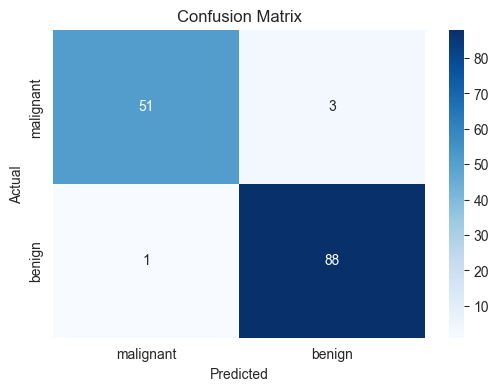

In [734]:
y_pred = best_lr_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Random Forrest hypertuning

In [735]:
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 500],
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [10, 20, 50, None],
    'classifier__min_samples_split': [2, 4, 6, 8],
}

grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=5, scoring='recall', n_jobs=-1)
grid_search.fit(X_train, y_train)

print(f'Best parameters for Random Forrest: \n {grid_search.best_params_}')
best_rf_model = grid_search.best_estimator_

rf_test_score = round(best_rf_model.score(X_test, y_test) * 100, 2)
print(f'Validation recall after tuning: \n {rf_test_score}')

rf_scores = cross_val_score(best_rf_model, X, y, cv=5, scoring='recall')
print(f'Cross-Validation Scores for Random Forrest: {rf_scores}')
print(f'Mean Cross-Validation Score: {rf_scores.mean() * 100:.2f}')

Best parameters for Random Forrest: 
 {'classifier__criterion': 'gini', 'classifier__max_depth': 50, 'classifier__min_samples_split': 8, 'classifier__n_estimators': 100}
Validation recall after tuning: 
 96.5
Cross-Validation Scores for Random Forrest: [1.         0.98591549 0.98611111 0.91666667 0.94366197]
Mean Cross-Validation Score: 96.65



Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        54
           1       0.97      0.98      0.97        89

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.97      0.97      0.96       143



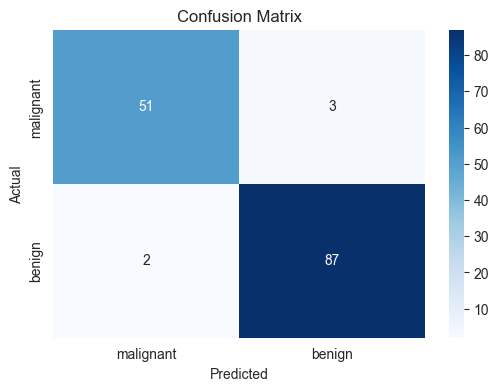

In [736]:
y_pred = best_rf_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Conclusions

**The best model** --> **Logistic regression**

The logistic regression model achieved the best results among the algorithms tested, offering both high performance and balanced classification. The model's low false-negative rate makes it suitable for practical use in detecting malignant tumors, which is crucial in the context of the priority assigned to class 0 (malignant).




Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        54
           1       0.99      0.99      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



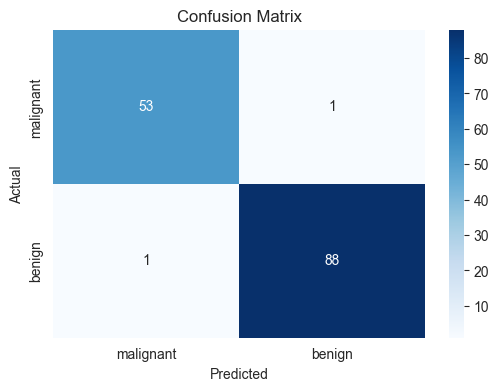

In [747]:
y_pred = best_xgb_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=cancer.target_names, yticklabels=cancer.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


### Saving model

In [756]:
def save_model(model, file_path):
    '''Function to save dataframe with each models metrics'''
    with open(file_path, 'wb') as file:
        pickle.dump(model, file)
    print(f"Best model is saved to a file {file_path}")

In [757]:
xgb_model_filename = 'models/xgb_model.pkl'
lr_model_filename = 'models/lr_model.pkl'
rf_model_filename = 'models/rf_model.pkl'
save_model(best_xgb_model, xgb_model_filename)
save_model(best_lr_model, lr_model_filename)
save_model(best_rf_model, rf_model_filename)

Best model is saved to a file models/xgb_model.pkl
Best model is saved to a file models/lr_model.pkl
Best model is saved to a file models/rf_model.pkl


### Verification of the model's operation

In [755]:
mean_values = X.mean().values
std_values = X.std().values
# Random data generation
np.random.seed(42)
generated_data = np.random.normal(loc=mean_values, scale=std_values, size=(100, X.shape[1]))

# Creating a DataFrame for generated data
pred_data = pd.DataFrame(generated_data, columns=X.columns)

In [758]:
with open(xgb_model_filename, 'rb') as file:
    loaded_model = pickle.load(file)

# Predictions on Logistic regression model
predictions = loaded_model.predict(pred_data)
print(f"Predictions: {predictions}")

Predictions: [1 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 1 0 0 1
 1 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 1 0]


In [760]:
required_features = X_train.columns.tolist()
print(f"Number of required features: {len(required_features)}\n")
print(f"The model requires the following features: {required_features}")

Number of required features: 30

The model requires the following features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'mean fractal dimension', 'radius error', 'texture error', 'perimeter error', 'area error', 'smoothness error', 'compactness error', 'concavity error', 'concave points error', 'symmetry error', 'fractal dimension error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
